In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime 
import numpy as np
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score
import math

from sklearn.model_selection import train_test_split

from catboost import CatBoostRegressor, cv, Pool

#To check for model training time
import time

pd.options.display.max_rows = None
pd.options.display.max_columns = None

from sklearn import tree

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
warnings.filterwarnings("ignore", "is_sparse")

import os

In [2]:
df = pd.read_csv(r'F:\Kabir\CSUN\Comp542\sampled_and_preprocessed_csv_team_4.csv')

In [3]:
df.head()

,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,humidity,visibility,icon,windBearing,moonPhase,precipIntensityMax
0,5,7,0,6,5,7.0,0.44,1.0,0.75,10.000,1,240,0.68,0.1064
1,5,7,0,10,6,9.0,0.44,1.0,0.70,10.000,5,303,0.72,0.0001
2,0,8,0,6,5,7.0,1.08,1.0,0.63,10.000,2,295,0.72,0.0000
3,6,11,1,0,9,7.5,1.11,1.0,0.56,9.959,4,76,0.21,0.0001
4,6,11,1,5,11,7.5,1.11,1.0,0.86,4.054,6,57,0.30,0.1252


In [4]:
list_of_columns = list(df.columns)
#print("list of cols", list_of_columns, type(list_of_columns))
list_of_columns.remove('price')
x_columns = list_of_columns
y_columns = ['price']
print('List X : ', x_columns,'\nList Y :', y_columns)

List X :  ['source', 'destination', 'cab_type', 'product_id', 'name', 'distance', 'surge_multiplier', 'humidity', 'visibility', 'icon', 'windBearing', 'moonPhase', 'precipIntensityMax'] 
List Y : ['price']


In [5]:
#Splitting DF.

x = df[x_columns]
y = df[y_columns]
print('X DF : ', x.head())
print('Y DF : ',y.head())

X DF :     source  destination  cab_type  product_id  name  distance  \
0       5            7         0           6     5      0.44   
1       5            7         0          10     6      0.44   
2       0            8         0           6     5      1.08   
3       6           11         1           0     9      1.11   
4       6           11         1           5    11      1.11   

   surge_multiplier  humidity  visibility  icon  windBearing  moonPhase  \
0               1.0      0.75      10.000     1          240       0.68   
1               1.0      0.70      10.000     5          303       0.72   
2               1.0      0.63      10.000     2          295       0.72   
3               1.0      0.56       9.959     4           76       0.21   
4               1.0      0.86       4.054     6           57       0.30   

   precipIntensityMax  
0              0.1064  
1              0.0001  
2              0.0000  
3              0.0001  
4              0.1252  
Y DF :     p

In [18]:
# Split dataset to training and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

not_executed = True

# Executing below cell will take 2.5 hrs. You can skip and execute the one after this cell. 

In [11]:
start_time = time.time()

from sklearn.model_selection import GridSearchCV
model = CatBoostRegressor(task_type='GPU', random_seed=13, verbose=200, loss_function='RMSE')
# set up our search grid
#param_grid = {"max_depth":    [4, 5, 6, 7, 3, 12],
#              "n_estimators": [500, 600, 700, 800, 900, 1000],
#              "learning_rate": [0.01, 0.015, 0.05, 0.1, 0.025, 0.03]}
grid = {'learning_rate': [0.03, 0.1, 0.2],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

# try out every combination of the above values
search = GridSearchCV(model, grid, cv=5).fit(X_train, y_train)


not_executed = False

end_time = time.time()

print("Cat Boost Model hypertuning Time (seconds) : ", round(end_time - start_time, 2))

0:	learn: 8.5730965	total: 22.3ms	remaining: 22.3s
200:	learn: 1.8558723	total: 9.23s	remaining: 36.7s
400:	learn: 1.7292343	total: 21.5s	remaining: 32.1s
600:	learn: 1.6782027	total: 33.9s	remaining: 22.5s
800:	learn: 1.6558394	total: 45.9s	remaining: 11.4s
999:	learn: 1.6449441	total: 57.6s	remaining: 0us
0:	learn: 8.6791130	total: 35.6ms	remaining: 35.6s
200:	learn: 1.8602178	total: 9.94s	remaining: 39.5s
400:	learn: 1.7394534	total: 22.2s	remaining: 33.2s
600:	learn: 1.7192331	total: 33.2s	remaining: 22.1s
800:	learn: 1.7034444	total: 44.1s	remaining: 10.9s
999:	learn: 1.6889825	total: 55.8s	remaining: 0us
0:	learn: 8.6429755	total: 28.7ms	remaining: 28.6s
200:	learn: 1.8308796	total: 10.4s	remaining: 41.2s
400:	learn: 1.6944940	total: 22.6s	remaining: 33.8s
600:	learn: 1.6646034	total: 34.2s	remaining: 22.7s
800:	learn: 1.6351394	total: 45.3s	remaining: 11.3s
999:	learn: 1.6087014	total: 56.5s	remaining: 0us
0:	learn: 8.5548264	total: 35.5ms	remaining: 35.5s
200:	learn: 1.8459552	

999:	learn: 1.4360664	total: 38.3s	remaining: 0us
0:	learn: 7.4716666	total: 15.6ms	remaining: 15.5s
200:	learn: 1.6112991	total: 2.97s	remaining: 11.8s
400:	learn: 1.5166957	total: 11.3s	remaining: 16.9s
600:	learn: 1.4668084	total: 19.9s	remaining: 13.2s
800:	learn: 1.4328074	total: 29s	remaining: 7.21s
999:	learn: 1.4252007	total: 37.6s	remaining: 0us
0:	learn: 7.4065268	total: 16.6ms	remaining: 16.6s
200:	learn: 1.5571112	total: 3.22s	remaining: 12.8s
400:	learn: 1.4444915	total: 12.1s	remaining: 18.1s
600:	learn: 1.4078978	total: 21.2s	remaining: 14.1s
800:	learn: 1.3873943	total: 29.5s	remaining: 7.32s
999:	learn: 1.3534999	total: 38.5s	remaining: 0us
0:	learn: 7.4426319	total: 18.9ms	remaining: 18.8s
200:	learn: 1.5735516	total: 3.32s	remaining: 13.2s
400:	learn: 1.4914109	total: 12.5s	remaining: 18.6s
600:	learn: 1.4367683	total: 21.7s	remaining: 14.4s
800:	learn: 1.4039781	total: 30.9s	remaining: 7.67s
999:	learn: 1.3639778	total: 39.9s	remaining: 0us
0:	learn: 8.5759458	total

800:	learn: 1.4845508	total: 29.8s	remaining: 7.4s
999:	learn: 1.4576320	total: 38.8s	remaining: 0us
0:	learn: 8.1272802	total: 15.9ms	remaining: 15.8s
200:	learn: 1.6848892	total: 3.12s	remaining: 12.4s
400:	learn: 1.5911585	total: 11.3s	remaining: 16.8s
600:	learn: 1.5338162	total: 21.2s	remaining: 14.1s
800:	learn: 1.5134623	total: 29.7s	remaining: 7.38s
999:	learn: 1.4794973	total: 38.4s	remaining: 0us
0:	learn: 7.4359957	total: 19.1ms	remaining: 19.1s
200:	learn: 1.6294975	total: 3.06s	remaining: 12.2s
400:	learn: 1.5709172	total: 11.7s	remaining: 17.5s
600:	learn: 1.5235443	total: 21s	remaining: 13.9s
800:	learn: 1.4899752	total: 30.5s	remaining: 7.59s
999:	learn: 1.4445652	total: 39.5s	remaining: 0us
0:	learn: 7.5277048	total: 14.6ms	remaining: 14.6s
200:	learn: 1.6584541	total: 3.03s	remaining: 12s
400:	learn: 1.5602147	total: 11.2s	remaining: 16.7s
600:	learn: 1.4871703	total: 20.3s	remaining: 13.5s
800:	learn: 1.4337605	total: 29.2s	remaining: 7.25s
999:	learn: 1.3906154	tota

600:	learn: 1.5974998	total: 22.7s	remaining: 15.1s
800:	learn: 1.5327651	total: 33.4s	remaining: 8.29s
999:	learn: 1.4746040	total: 43.4s	remaining: 0us
0:	learn: 8.1073290	total: 21.6ms	remaining: 21.6s
200:	learn: 1.6507824	total: 3.5s	remaining: 13.9s
400:	learn: 1.5296812	total: 10.2s	remaining: 15.2s
600:	learn: 1.4663048	total: 21.1s	remaining: 14s
800:	learn: 1.4270532	total: 31.7s	remaining: 7.88s
999:	learn: 1.4138831	total: 42.8s	remaining: 0us
0:	learn: 8.0725821	total: 23.6ms	remaining: 23.5s
200:	learn: 1.5862211	total: 3.56s	remaining: 14.2s
400:	learn: 1.4959218	total: 11.6s	remaining: 17.3s
600:	learn: 1.4486692	total: 22.1s	remaining: 14.7s
800:	learn: 1.4223019	total: 32s	remaining: 7.96s
999:	learn: 1.3787730	total: 44.2s	remaining: 0us
0:	learn: 7.9905443	total: 19.7ms	remaining: 19.6s
200:	learn: 1.5956444	total: 4.45s	remaining: 17.7s
400:	learn: 1.4846390	total: 16.1s	remaining: 24.1s
600:	learn: 1.3991602	total: 28s	remaining: 18.6s
800:	learn: 1.3568165	total:

400:	learn: 1.6288237	total: 8.72s	remaining: 13s
600:	learn: 1.5920621	total: 20.8s	remaining: 13.8s
800:	learn: 1.5810230	total: 32.4s	remaining: 8.05s
999:	learn: 1.5704081	total: 41.5s	remaining: 0us
0:	learn: 8.5374960	total: 20.9ms	remaining: 20.9s
200:	learn: 1.7467219	total: 4.25s	remaining: 16.9s
400:	learn: 1.6850779	total: 9s	remaining: 13.4s
600:	learn: 1.6484524	total: 20.6s	remaining: 13.7s
800:	learn: 1.6161647	total: 34.6s	remaining: 8.59s
999:	learn: 1.5934387	total: 48.5s	remaining: 0us
0:	learn: 8.5848878	total: 21.3ms	remaining: 21.3s
200:	learn: 1.7619880	total: 4.17s	remaining: 16.6s
400:	learn: 1.6558060	total: 8.95s	remaining: 13.4s
600:	learn: 1.6201184	total: 19s	remaining: 12.6s
800:	learn: 1.5908151	total: 32.5s	remaining: 8.06s
999:	learn: 1.5748329	total: 44.5s	remaining: 0us
0:	learn: 8.0297193	total: 23.9ms	remaining: 23.9s
200:	learn: 1.6200638	total: 4.15s	remaining: 16.5s
400:	learn: 1.5543256	total: 12.2s	remaining: 18.3s
600:	learn: 1.4922415	total:

200:	learn: 1.5755962	total: 3.99s	remaining: 15.9s
400:	learn: 1.5324850	total: 12.6s	remaining: 18.8s
600:	learn: 1.4678509	total: 24.9s	remaining: 16.5s
800:	learn: 1.4242682	total: 35.6s	remaining: 8.85s
999:	learn: 1.3726213	total: 47.2s	remaining: 0us
0:	learn: 8.5623985	total: 21.3ms	remaining: 21.2s
200:	learn: 1.7704226	total: 4.21s	remaining: 16.7s
400:	learn: 1.6589238	total: 9.06s	remaining: 13.5s
600:	learn: 1.6141400	total: 17.3s	remaining: 11.5s
800:	learn: 1.5933532	total: 30.5s	remaining: 7.58s
999:	learn: 1.5850800	total: 43.1s	remaining: 0us
0:	learn: 8.6682945	total: 20.2ms	remaining: 20.2s
200:	learn: 1.8074321	total: 4.08s	remaining: 16.2s
400:	learn: 1.7269139	total: 8.93s	remaining: 13.3s
600:	learn: 1.7013925	total: 19.3s	remaining: 12.8s
800:	learn: 1.6690569	total: 30.8s	remaining: 7.66s
999:	learn: 1.6446458	total: 42.4s	remaining: 0us
0:	learn: 8.6326920	total: 20.5ms	remaining: 20.5s
200:	learn: 1.7674352	total: 4.45s	remaining: 17.7s
400:	learn: 1.6574650

999:	learn: 1.3299235	total: 17.8s	remaining: 0us
0:	learn: 7.2760203	total: 67.8ms	remaining: 1m 7s
200:	learn: 1.5146759	total: 4.73s	remaining: 18.8s
400:	learn: 1.4846175	total: 8.14s	remaining: 12.2s
600:	learn: 1.3584154	total: 12s	remaining: 7.98s
800:	learn: 1.2708079	total: 16.1s	remaining: 4.01s
999:	learn: 1.2555770	total: 19.2s	remaining: 0us
0:	learn: 7.2501386	total: 61.2ms	remaining: 1m 1s
200:	learn: 1.4272205	total: 4.9s	remaining: 19.5s
400:	learn: 1.2832421	total: 9.2s	remaining: 13.7s
600:	learn: 1.2194564	total: 13.2s	remaining: 8.76s
800:	learn: 1.1781018	total: 16.8s	remaining: 4.17s
999:	learn: 1.1549169	total: 20.3s	remaining: 0us
0:	learn: 7.1742849	total: 61.8ms	remaining: 1m 1s
200:	learn: 1.4948841	total: 4.69s	remaining: 18.6s
400:	learn: 1.3175302	total: 8.6s	remaining: 12.8s
600:	learn: 1.2646156	total: 12.1s	remaining: 8.03s
800:	learn: 1.2170046	total: 15.7s	remaining: 3.89s
999:	learn: 1.1946245	total: 18.9s	remaining: 0us
0:	learn: 7.2233155	total: 6

600:	learn: 1.3593797	total: 16.8s	remaining: 11.1s
800:	learn: 1.2825094	total: 22.6s	remaining: 5.62s
999:	learn: 1.2694255	total: 26.6s	remaining: 0us
0:	learn: 8.0081999	total: 41ms	remaining: 41s
200:	learn: 1.5986323	total: 6.42s	remaining: 25.5s
400:	learn: 1.4902279	total: 11.8s	remaining: 17.6s
600:	learn: 1.3998871	total: 16.9s	remaining: 11.2s
800:	learn: 1.3591180	total: 21.1s	remaining: 5.23s
999:	learn: 1.3243316	total: 25.2s	remaining: 0us
0:	learn: 8.0550911	total: 37.3ms	remaining: 37.2s
200:	learn: 1.5484102	total: 7.4s	remaining: 29.4s
400:	learn: 1.4754788	total: 12.4s	remaining: 18.5s
600:	learn: 1.4444267	total: 16.1s	remaining: 10.7s
800:	learn: 1.4280194	total: 20.4s	remaining: 5.08s
999:	learn: 1.4018196	total: 25.4s	remaining: 0us
0:	learn: 7.2799733	total: 66.3ms	remaining: 1m 6s
200:	learn: 1.5311789	total: 5.74s	remaining: 22.8s
400:	learn: 1.3475402	total: 11.4s	remaining: 17s
600:	learn: 1.2843907	total: 16.5s	remaining: 10.9s
800:	learn: 1.2609549	total:

400:	learn: 1.6464018	total: 25s	remaining: 37.3s
600:	learn: 1.5851295	total: 36.9s	remaining: 24.5s
800:	learn: 1.5517598	total: 47.5s	remaining: 11.8s
999:	learn: 1.5144585	total: 58.3s	remaining: 0us
0:	learn: 8.0500424	total: 55.1ms	remaining: 55.1s
200:	learn: 1.5806842	total: 11.1s	remaining: 44s
400:	learn: 1.5349958	total: 17.6s	remaining: 26.4s
600:	learn: 1.5162722	total: 23.8s	remaining: 15.8s
800:	learn: 1.3995519	total: 32.8s	remaining: 8.15s
999:	learn: 1.3917516	total: 38.4s	remaining: 0us
0:	learn: 8.1488800	total: 55.1ms	remaining: 55.1s
200:	learn: 1.6354796	total: 8.39s	remaining: 33.4s
400:	learn: 1.5426603	total: 17s	remaining: 25.5s
600:	learn: 1.4207675	total: 27.8s	remaining: 18.5s
800:	learn: 1.3137478	total: 38.8s	remaining: 9.65s
999:	learn: 1.2713881	total: 48.5s	remaining: 0us
0:	learn: 8.1142531	total: 43.7ms	remaining: 43.7s
200:	learn: 1.5442196	total: 11.2s	remaining: 44.5s
400:	learn: 1.4660401	total: 21.4s	remaining: 32s
600:	learn: 1.4445352	total: 

In [19]:
#              "learning_rate": [0.01, 0.015, 0.05, 0.1, 0.025, 0.03]}
grid = {'learning_rate': [0.03, 0.1, 0.2],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

if not_executed:
    learning_rate_ = 0.1
    depth_ = 10
    l2_leaf_reg_ = 7
else:
    
    learning_rate_ = search.best_params_["learning_rate"]
    depth_ = search.best_params_["depth"]
    l2_leaf_reg_ = search.best_params_["l2_leaf_reg"]
    

In [20]:
#Model Training

start_time = time.time()

model = CatBoostRegressor(task_type='GPU', random_seed=13, verbose=200, loss_function='RMSE', learning_rate = learning_rate_, depth = depth_, l2_leaf_reg = l2_leaf_reg_)

model.fit(X_train, y_train)

end_time = time.time()

print("CatBoost Model Training Time (seconds) : ", round(end_time - start_time, 2))


0:	learn: 8.0654238	total: 83.4ms	remaining: 1m 23s
200:	learn: 1.5880923	total: 9.86s	remaining: 39.2s
400:	learn: 1.5218057	total: 16.7s	remaining: 24.9s
600:	learn: 1.4151069	total: 24.1s	remaining: 16s
800:	learn: 1.3283516	total: 31.1s	remaining: 7.73s
999:	learn: 1.2554555	total: 38.2s	remaining: 0us
CatBoost Model Training Time (seconds) :  39.09


In [22]:
predictions = model.predict(X_test)

pred_train = model.predict(X_train)


print( "R2 Score Training : %0.3f" %r2_score(y_train, pred_train) ) # how much variance the regressor explains?
print( "Mean Square Error Training : %0.3f" %mean_squared_error(y_train, pred_train) )


print("Model score Testing : %0.3f" %model.score(X_test, y_test) ) ## R^2



print("R2 Score Testing : %0.3f" %r2_score(y_test, predictions))



print("Mean Square Error Testing : %0.3f" %mean_squared_error(y_test, predictions))

print("Root Mean Square Error Testing : %0.3f" %np.sqrt(mean_squared_error(y_test, predictions)))

R2 Score Training : 0.980
Mean Square Error Training : 1.576
Model score Testing : 0.971
R2 Score Testing : 0.971
Mean Square Error Testing : 2.205
Root Mean Square Error Testing : 1.485


Text(0.5, 1.0, 'CatBoost features importance:')

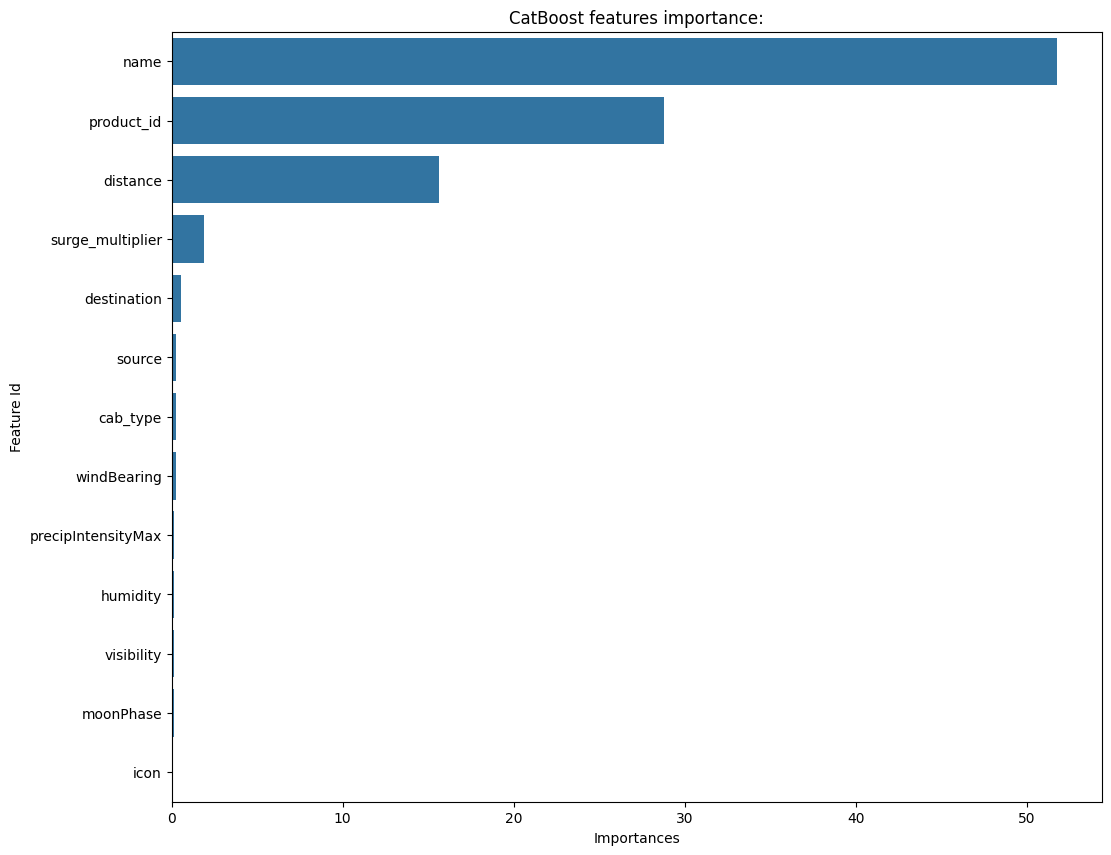

In [24]:
plt.figure(figsize=(12, 10))
sns.barplot(x="Importances", y="Feature Id", data=model.get_feature_importance(prettified=True).loc[:30, :])
plt.title('CatBoost features importance:')

In [40]:

### Add path to Graphviz binary folder.
#import os
#os.environ["PATH"] += os.pathsep + r'C:\Users\isha\zoro_venv\Lib\site-packages\treeplot\RESOURCES\graphviz-2.38\release\bin'

#fig, ax = plt.subplots(figsize=(30, 30))

#pool = Pool(x, y, feature_names=list(x.columns))

#model.plot_tree(tree_idx=0, pool = pool)

#plt.show()

#WORK IN PROGRESS
